In [7]:
# 📦 Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
# 📥 Load the dataset
df = pd.read_csv('Mall_Customers.csv')  # Replace with your path if needed
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
# 🧹 Data Preprocessing
# Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [10]:
# Standardize the features to bring them to the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

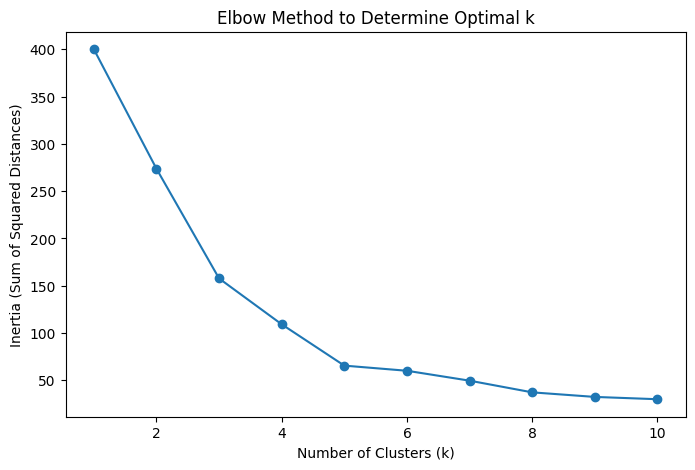

In [11]:
# 📊 Determine optimal number of clusters using Elbow Method
inertia = []  # Stores the sum of squared distances for each k

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

In [12]:
# 📌 From the plot, choose optimal k (example: k=5)
optimal_k = 5

In [13]:
# 🚀 Apply K-Means Clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

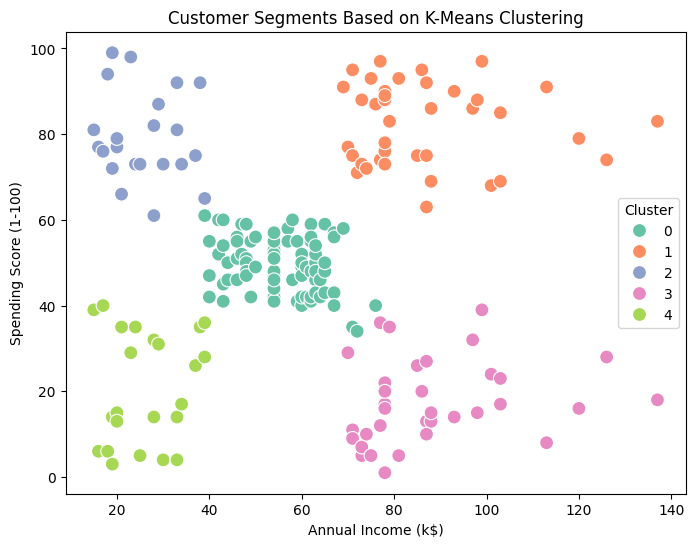

In [14]:
# 📈 Visualize the Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set2', data=df, s=100)
plt.title('Customer Segments Based on K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [15]:
# 📌 Display cluster centers (in scaled form)
print("Cluster Centers (scaled):")
print(kmeans.cluster_centers_)

Cluster Centers (scaled):
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]
